In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = r'D:\Ineuron materials FSDS\Deep Learning\car-classification\data\Cars Dataset\train'
test_data = r'D:\Ineuron materials FSDS\Deep Learning\car-classification\data\Cars Dataset\test'

In [3]:
batch_size = 32

## Training data

In [6]:
train_data_gen = ImageDataGenerator( 
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20,
        vertical_flip = True)


train_generator = train_data_gen.flow_from_directory(
    directory=train_data,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",  # Use 'categorical' for multi-class classification
    subset='training',
    shuffle=True,
    seed=42)


Found 2684 images belonging to 7 classes.


## Validation data

In [7]:
validation_generator = train_data_gen.flow_from_directory(
    directory=train_data,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",  # Use 'categorical' for multi-class classification
    subset='validation',
    shuffle=True,
    seed=42
)

Found 668 images belonging to 7 classes.


## Test data

In [9]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(
    directory=test_data,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",  # Use 'categorical' for multi-class classification
    shuffle=False,
    seed=42)  # Use 'categorical' for multi-class classification

Found 813 images belonging to 7 classes.


In [10]:
class_map = dict([(v,k) for k,v in train_generator.class_indices.items()])
class_map

{0: 'Audi',
 1: 'Hyundai Creta',
 2: 'Mahindra Scorpio',
 3: 'Rolls Royce',
 4: 'Swift',
 5: 'Tata Safari',
 6: 'Toyota Innova'}

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[200, 200, 3]))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(2, ))
model.add(Dropout(0.3))

##################################################################################3

model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

In [12]:
train_generator.n

2684

In [13]:
train_generator.batch_size

32

In [14]:
validation_generator.batch_size

32

In [15]:
validation_generator.n

668

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')

In [24]:
hist = model.fit_generator(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = validation_generator.n//validation_generator.batch_size,
                    epochs=2)

C:\Users\NABEEL\AppData\Local\Temp\ipykernel_10344\2978285825.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator,


Epoch 1/2
83/83 [==============================] - 112s 1s/step - loss: 1.8654 - accuracy: 0.2387 - val_loss: 1.8770 - val_accuracy: 0.2109
Epoch 2/2
83/83 [==============================] - 123s 1s/step - loss: 1.8638 - accuracy: 0.2376 - val_loss: 1.8577 - val_accuracy: 0.2328


In [20]:
# score = model.evaluate_generator(validation_generator)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

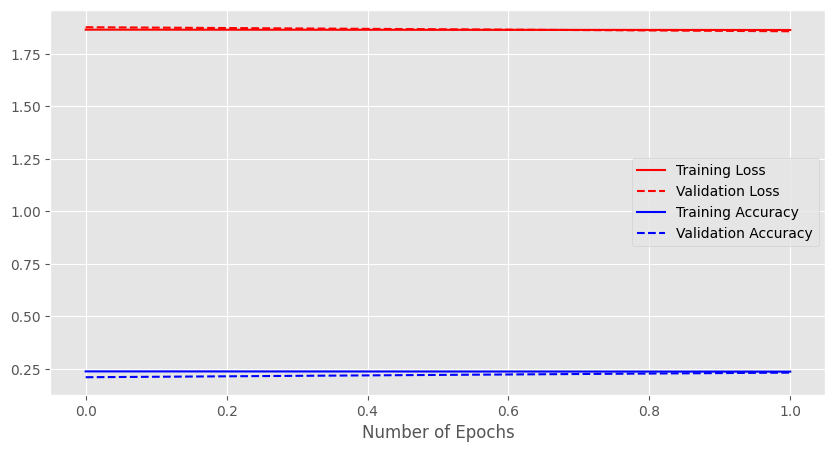

In [25]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [26]:
model.evaluate(test_generator)

813/813 [==============================] - 16s 20ms/step - loss: 1.8595 - accuracy: 0.2448


[1.8594906330108643, 0.24477244913578033]

1/1 [==============================] - 0s 55ms/step
0


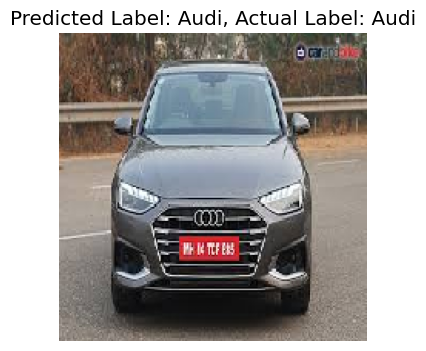

In [33]:
test_image_path = r'D:\Ineuron materials FSDS\Deep Learning\car-classification\data\Cars Dataset\test\Audi\109.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(200, 200))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    print(predicted_label)
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Audi')

In [28]:
model.save("car.h5")

C:\Users\NABEEL\Anaconda3\envs\DLNLP\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
car = tf.keras.models.load_model('car.h5')